Links:
* [How to Use Word Embedding Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)
* [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)
* [How to Develop a Word Embedding Model for Predicting Movie Review Sentiment
](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)
* [Embed, encode, attend, predict: The new deep learning formula for state-of-the-art NLP models](https://explosion.ai/blog/deep-learning-formula-nlp)
* [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Input, Dense, Embedding, Flatten, Dropout
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import seaborn as sn
from time import time
%matplotlib inline

Using TensorFlow backend.


In [2]:
def create_encoder_decoder(all_text):
    chars = sorted(set(all_text))
    char_to_int = dict((c, i) for i, c in enumerate(chars))
    int_to_char = dict((i, c) for i, c in enumerate(chars))
    return char_to_int, int_to_char

def encode_string(line, char_to_int, l):
    z = np.zeros(l)
    z[0:len(line)] = [char_to_int[c] for c in line]
    return z / float(len(char_to_int))

def encode_strings(lines, char_to_int, l):
    return np.array([encode_string(line, char_to_int, l) for line in lines])

In [3]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# input = Input(shape=(max_tweet_len,1))
# x = Conv1D(1024, kernel_size=4, activation='relu')(input)
# #x = Dropout(0.1)(x)
# x = MaxPooling1D(pool_size=2)(x)
# x = Conv1D(1024, kernel_size=4, activation='relu')(x)
# #x = Dropout(0.1)(x)
# x = MaxPooling1D(pool_size=2)(x)
# x = Conv1D(512, kernel_size=4, activation='relu')(x)
# #x = Dropout(0.1)(x)
# x = MaxPooling1D(pool_size=2)(x)
# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(2, activation='softmax')(x)
# model = Model(input, x)
# optimizer = Adam(lr=0.0003)
# model.compile(loss='binary_crossentropy', optimizer=optimizer)
# #model.summary()

In [5]:
#model2
input = Input(shape=(max_tweet_len,1))
x = Conv1D(256, kernel_size=4, activation='relu')(input)
x = Dropout(0.2)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, kernel_size=4, activation='relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(32, kernel_size=4, activation='relu')(x)
x = Dropout(0.2)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
#x = Dense(1024, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
model = Model(input, x)
optimizer = Adam(lr=0.0003)
model.compile(loss='binary_crossentropy', optimizer=optimizer)
model.summary()

W0429 21:51:33.921588 4732589504 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 163, 256)          1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 163, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 78, 64)            65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 78, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 39, 64)            0         
__________

In [6]:
filepath='model2-weights.hdf5'
model.load_weights(filepath)

In [6]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
callbacks_list = [checkpoint, tensorboard]
model.fit(np.expand_dims(X_train, axis=2), 
          np_utils.to_categorical(y_train), 
          epochs=500, 
          batch_size=1000, 
          callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
69168/69168 [==============================] - 74s 1ms/step - loss: 0.5581

Epoch 00001: loss improved from inf to 0.55806, saving model to model2-weights.hdf5
Epoch 2/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5598

Epoch 00002: loss did not improve from 0.55806
Epoch 3/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5588

Epoch 00003: loss did not improve from 0.55806
Epoch 4/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5582

Epoch 00004: loss did not improve from 0.55806
Epoch 5/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5575

Epoch 00005: loss improved from 0.55806 to 0.55753, saving model to model2-weights.hdf5
Epoch 6/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5559

Epoch 00006: loss improved from 0.55753 to 0.55590, saving model to model2-weights.hdf5
Epoch 7/500
69168/69168

69168/69168 [==============================] - 72s 1ms/step - loss: 0.5525

Epoch 00116: loss did not improve from 0.55174
Epoch 117/500
69168/69168 [==============================] - 71s 1ms/step - loss: 0.5529

Epoch 00117: loss did not improve from 0.55174
Epoch 118/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5534

Epoch 00118: loss did not improve from 0.55174
Epoch 119/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5524

Epoch 00119: loss did not improve from 0.55174
Epoch 120/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5529

Epoch 00120: loss did not improve from 0.55174
Epoch 121/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5537

Epoch 00121: loss did not improve from 0.55174
Epoch 122/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5534

Epoch 00122: loss did not improve from 0.55174
Epoch 123/500
69168/69168 [============================

69168/69168 [==============================] - 72s 1ms/step - loss: 0.5483

Epoch 00233: loss did not improve from 0.54642
Epoch 234/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5475

Epoch 00234: loss did not improve from 0.54642
Epoch 235/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5485

Epoch 00235: loss did not improve from 0.54642
Epoch 236/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5496

Epoch 00236: loss did not improve from 0.54642
Epoch 237/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5485

Epoch 00237: loss did not improve from 0.54642
Epoch 238/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5453

Epoch 00238: loss improved from 0.54642 to 0.54528, saving model to model2-weights.hdf5
Epoch 239/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5483

Epoch 00239: loss did not improve from 0.54528
Epoch 240/500


69168/69168 [==============================] - 72s 1ms/step - loss: 0.5450

Epoch 00349: loss did not improve from 0.54228
Epoch 350/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5442

Epoch 00350: loss did not improve from 0.54228
Epoch 351/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5469

Epoch 00351: loss did not improve from 0.54228
Epoch 352/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5429

Epoch 00352: loss did not improve from 0.54228
Epoch 353/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5454

Epoch 00353: loss did not improve from 0.54228
Epoch 354/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5448

Epoch 00354: loss did not improve from 0.54228
Epoch 355/500
69168/69168 [==============================] - 72s 1ms/step - loss: 0.5458

Epoch 00355: loss did not improve from 0.54228
Epoch 356/500
69168/69168 [============================

69168/69168 [==============================] - 72s 1ms/step - loss: 0.5419

Epoch 00408: loss did not improve from 0.54075
Epoch 409/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5423

Epoch 00409: loss did not improve from 0.54075
Epoch 410/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5421

Epoch 00410: loss did not improve from 0.54075
Epoch 411/500
69168/69168 [==============================] - 74s 1ms/step - loss: 0.5411

Epoch 00411: loss did not improve from 0.54075
Epoch 412/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5409

Epoch 00412: loss did not improve from 0.54075
Epoch 413/500
69168/69168 [==============================] - 73s 1ms/step - loss: 0.5430

Epoch 00413: loss did not improve from 0.54075
Epoch 414/500
69168/69168 [==============================] - 74s 1ms/step - loss: 0.5431

Epoch 00414: loss did not improve from 0.54075
Epoch 415/500
69168/69168 [============================

KeyboardInterrupt: 

In [7]:
predictions = np.argmax(model.predict(np.expand_dims(X_test, axis=2)), axis=1)

Accuracy: 0.6648160999306038
Precision: 0.6720764272559853
Recall: 0.6645800136580924
F1: 0.668307199267483
Precision: [[5657 2849]
 [2947 5839]]


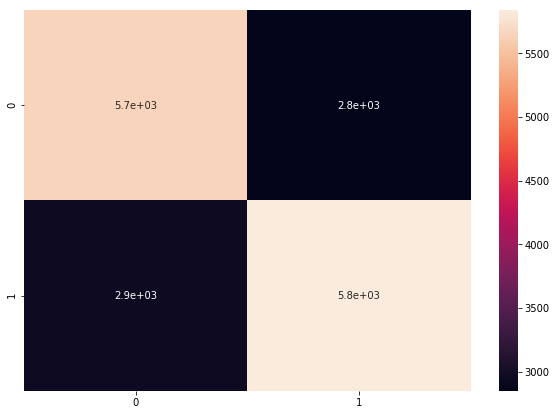

In [8]:
plt.figure(figsize = (10,7))
print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
print('Precision: {}'.format(precision_score(y_test, predictions)))
print('Recall: {}'.format(recall_score(y_test, predictions)))
print('F1: {}'.format(f1_score(y_test, predictions)))
print('Precision: {}'.format(confusion_matrix(y_test, predictions)))

sn.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
def model1():
    input = Input(shape=(max_tweet_len,1))
    x = Conv1D(256, kernel_size=4, activation='relu')(input)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(64, kernel_size=4, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(32, kernel_size=4, activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(input, x)
    optimizer = Adam(lr=0.0003)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model